In [13]:
# First we read in and get an overview of the data
import pandas as pd
miles_driven=pd.read_csv(r"C:\Users\aiman\Downloads\miles-driven.csv", sep='|')
road_accidents=pd.read_csv(r"C:\Users\aiman\Downloads\road-accidents.csv", sep='|')
road_accidents.head()
road_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [15]:
road_accidents_describe=road_accidents.describe()
print(road_accidents_describe)

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


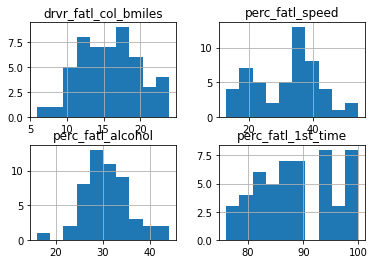

In [10]:
hist_road_accidents = road_accidents.hist()

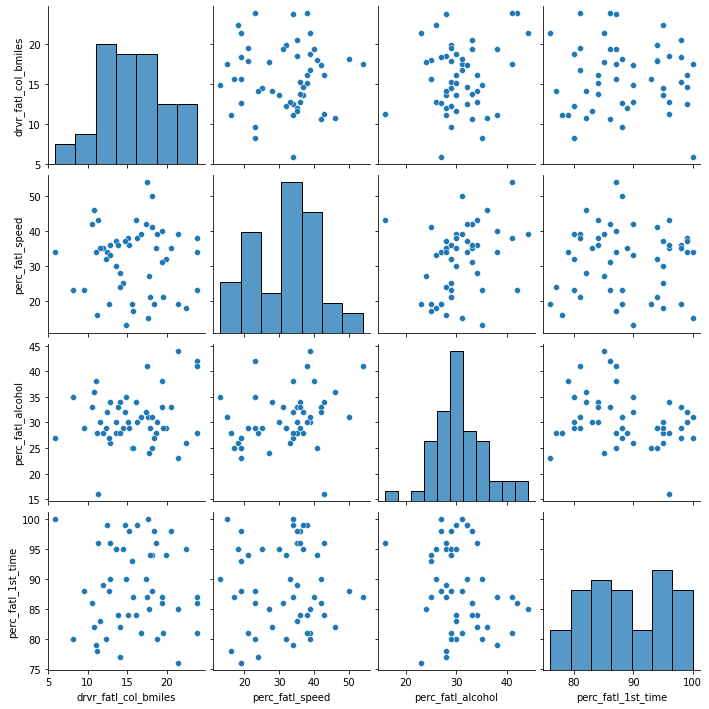

In [17]:
#Next we're going to create a textual and a graphical summary of the data
import seaborn as sns
#sns.pairplot(road_accidents_describe)
sns.pairplot(road_accidents)

In [21]:
#Now to quantify the association of features and accidents.
road_accidents_correlation=road_accidents.corr()
road_accidents_correlation
'''
We can infer that the amount of fatal accidents is most strongly correlated with alcohol consumption.
But in addition, we also see that some of the features are correlated with each other, for instance, 
speeding and alcohol consumption are positively correlated.'''

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [22]:
'''Now we fit a multivariate linear regression so that we can take into account 
the correlation between alchohol consumption and speed.'''
from sklearn.linear_model import LinearRegression
features=road_accidents[["perc_fatl_speed","perc_fatl_alcohol","perc_fatl_1st_time"]]
target=road_accidents["drvr_fatl_col_bmiles"]
lin_reg=LinearRegression()
lin_reg.fit(features,target)
reg_coeff=lin_reg.coef_
reg_coeff
'''
We see a strong correlation between alcohol consumption and fatal accidents also we saw that
first time which was negatively correlated in pearson correlation is positively correlated 
when adjusting for association with other features. 
'''
#There is a masking relationship between fatal accidents and the first time.

array([-0.04180041,  0.19086404,  0.02473301])

0.7947


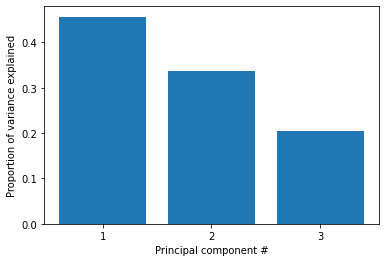

In [25]:
import numpy as np
#Since we were asked to scale the data and centre it around the mean
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)

#Now we apply PCA to these scaled features
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(features_scaled)
#Now we will plot the proportion of variance explained by each principal component on the y- axis 
import matplotlib.pyplot as plt
plt.bar(range(1,pca.n_components_ + 1),pca.explained_variance_ratio_)
plt.xlabel("Principal component #")
plt.ylabel("Proportion of variance explained")
plt.xticks([1,2,3])
#Proportion of variance explained by the first two principal components
first_two=round((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]),5)
print(first_two)

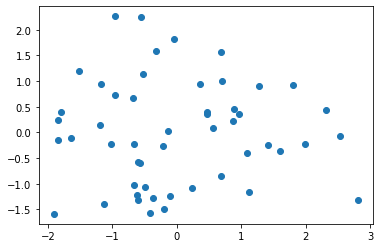

In [27]:
#Visualize the first two principal components
pca=PCA(n_components=2)
p_comp=pca.fit_transform(features_scaled)
pca1=p_comp[:,0]
pca2=p_comp[:,1]
plt.scatter(pca1,pca2)

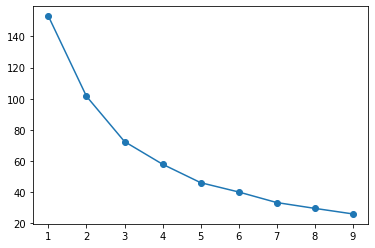

In [29]:
#Since it isn't obvious how many clusters there should be we find using elbow
from sklearn.cluster import KMeans
# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
k_range=range(1,10)
inertias=[]
for k in k_range:
    km=KMeans(n_clusters=k,random_state=0)
    km.fit(features_scaled)
    inertias.append(km.inertia_)
    
#Create a plot of inertias to identify the elbow
plt.plot(k_range,inertias,marker='o')

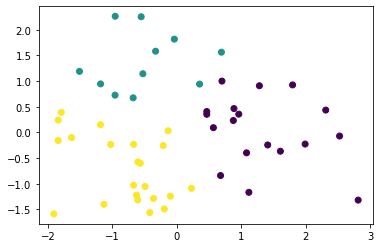

In [47]:
#Since there isn't a clear elbow we will use 3 clusters and see how the PCA scatter plot looks assigned to 3 clusters
km=KMeans(n_clusters=3,random_state=8)
km.fit(features_scaled)
plt.scatter(pca1,pca2,c=km.labels_)

<AxesSubplot:xlabel='percentage', ylabel='measurement'>

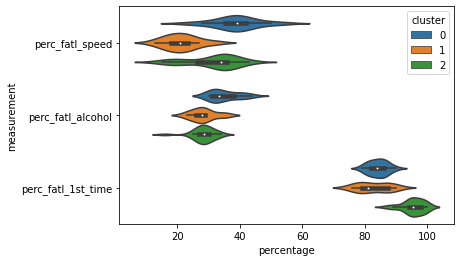

In [38]:
#To Visualise the feature differences between the clutsers
road_accidents["cluster"]=km.labels_
melt_road_accidents=pd.melt(road_accidents,id_vars=['cluster'],value_vars=["perc_fatl_speed","perc_fatl_alcohol","perc_fatl_1st_time"],var_name="measurement",value_name="percentage")
display(melt_road_accidents.tail())
sns.violinplot(x=melt_road_accidents["percentage"],y=melt_road_accidents["measurement"],hue=melt_road_accidents["cluster"])

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_of_drivers
0,Alabama,18.8,39,30,80,0,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,2,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080


<AxesSubplot:xlabel='cluster', ylabel='num_of_drivers'>

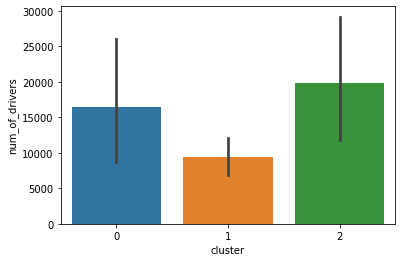

In [40]:
'''Therefore we recognise that different groups of states may require a different intervention thus 
we start by choosing a group by the miles driven.
'''
road_accidents_miles_driven=road_accidents.merge(miles_driven,on="state")

#Now we find no. of drivers involved in fatal accidents like so.
road_accidents_miles_driven["num_of_drivers"]=(road_accidents_miles_driven["drvr_fatl_col_bmiles"]*road_accidents_miles_driven["million_miles_annually"])/1000
display(road_accidents_miles_driven.head())

#Next we show the no. of accidents within each cluster 
sns.barplot(x="cluster",y="num_of_drivers",data=road_accidents_miles_driven,estimator=sum)

In [44]:
'''
Now I would like to just view the number of states within each cluster as well as the mean and total number of driver fatalities
so that we can choose a cluster to base our policies on
'''
count_mean_sum=road_accidents_miles_driven.groupby("cluster")["num_of_drivers"].agg(["count","mean","sum"])
count_mean_sum

,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


Therefore as we can see, there is no obvious correct choice regarding which cluster is the most important to focus on.
But our findings above suggest that we may focus on cluster 0 since it has the highest mean number of driver fatalities.
Thus would me most effective for the expense.
Thus it should be a focus for policy intervention and further investigation.